<a href="https://colab.research.google.com/github/IlhamKhalis/MachineLearning_2023/blob/main/Job%20Sheet%209%3A%20Perceptron%20dan%20ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ilham Khalis Putra Agatha
3G
2141720230

Link Github : https://github.com/IlhamKhalis/MachineLearning_2023

Praktikum 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Klasifikasi Iris dengan Perceptron

In [ ]:
# Langkah 1 - Import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


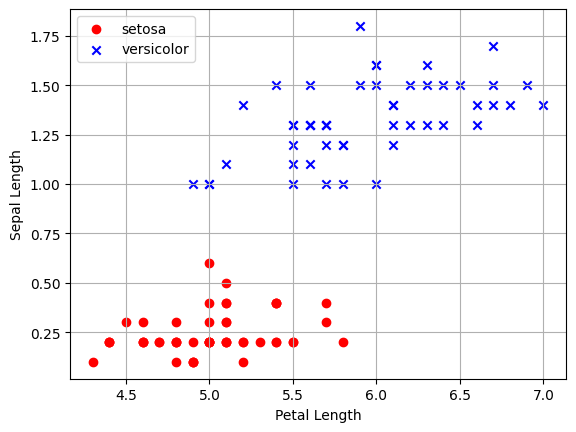

In [ ]:
# Langkah 2 - Load Data dan Visualisasi
df = pd.read_csv('/content/drive/MyDrive/iris.csv', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()


In [ ]:
# Langkah 3 -  Membuat Kelas Perceptron
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
# Langkah 4 - Pilih Data dan Encoding Label
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

In [ ]:
# Langkah 5 - Fitting Model
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

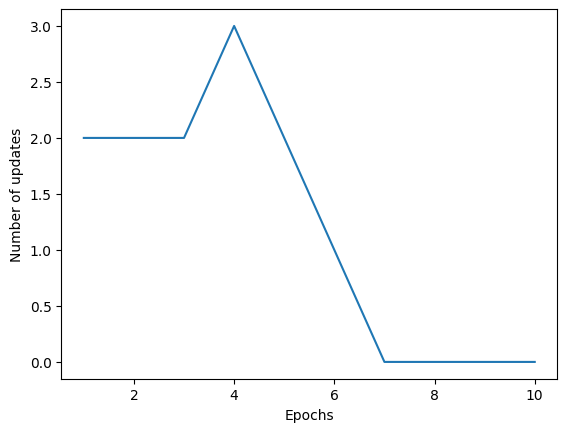

In [ ]:
# Langkah 6 - Visualisasi Nilai Error Per Epoch
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [ ]:
# Langkah 7 - Visualiasasi Decision Boundary
# buat fungsi untuk plot decision region
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

<ipython-input-10-d50fb3cc6327>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


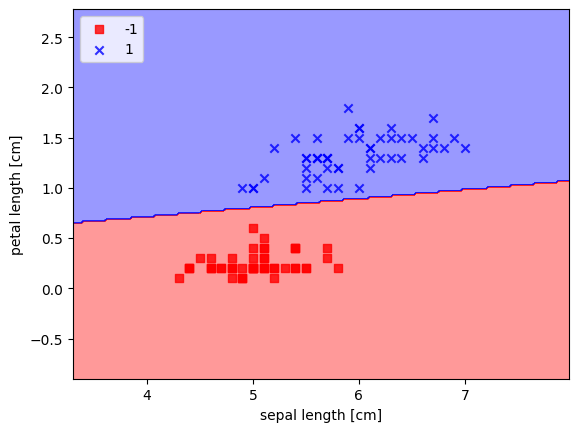

In [ ]:
# hasil plot

plot_decision_regions(X, y, ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Praktikum 2

Klasifikasi Berita dengan Perceptron

In [ ]:
# Langkah 1 - Import Library
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

In [ ]:
# Langkah 2 - Pilih Label dan Split Data
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

In [ ]:
# Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



Praktikum 3

Nilai Logika XOR dengan MLP

In [ ]:
# Langkah 1 - Import Library
from sklearn.neural_network import MLPClassifier

In [ ]:
# Langah 2 - Buat Data
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

In [ ]:
# Langkah 3 - Fit Model
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

In [ ]:
# Langkah 4 - Prediksi
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


Praktikum 4

Klasifikasi dengan ANN

In [ ]:
# Langkah 1 - Import Library
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
# Langkah 2 - Load Data
dataset = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
# Cek Data
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [ ]:
# Langkah 3 - Encoding Data Kategorikal
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [ ]:
# Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [ ]:
# Langkah 5 - Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Langkah 6 - Scaling Fitur
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Membuat Model ANN

In [ ]:
# Langkah 1 - Inisiasi Model ANN
ann = tf.keras.models.Sequential()

In [ ]:
# Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
# Langkah 3 - Membuat Hidden Layer Kedua
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
# Langkah 4 - Membuat Output Layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Training Model

In [ ]:
# Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Langkah 2 - Fitting Model
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)


Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3344 - accuracy: 0.8646
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3349 - accuracy: 0.8636
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3341 - accuracy: 0.8641
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3346 - accuracy: 0.8646
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3346 - accuracy: 0.8639
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3343 - accuracy: 0.8658
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3347 - accuracy: 0.8635
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3341 - accuracy: 0.8651
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3341 - accuracy: 0.8650
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3341 - accura

In [ ]:
# Modelkan Data Baru dan Buat Prediksi
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 108ms/step
[[False]]


In [ ]:
# Prediksi Dengan Data Testing
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
# Cek Akurasi dan Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1501   94]
 [ 188  217]]


0.859

TUGAS PRAKTIKUM

In [ ]:
# Langkah 1: Import Library
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
# Langkah 2: Load Dataset MNIST
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Langkah 3: Pra Pengolahan Data
train_images = train_images.reshape(-1, 28*28)
test_images = test_images.reshape(-1, 28*28)

train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Langkah 4: Arsitektur ANN
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Langkah 5: Kompilasi Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Langkah 6: Pelatihan Model
model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2680 - accuracy: 0.9222 - val_loss: 0.1384 - val_accuracy: 0.9592
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1114 - accuracy: 0.9662 - val_loss: 0.1214 - val_accuracy: 0.9639
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0753 - accuracy: 0.9769 - val_loss: 0.1140 - val_accuracy: 0.9646
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0571 - accuracy: 0.9822 - val_loss: 0.1023 - val_accuracy: 0.9732
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0439 - accuracy: 0.9859 - val_loss: 0.1337 - val_accuracy: 0.9622
Epoch 6/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0360 - accuracy: 0.9880 - val_loss: 0.1035 - val_accuracy: 0.9732
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0300 - accuracy: 0.9899 - val_loss: 0.1049 - val_accuracy:

In [ ]:
# Langkah 7: Evaluasi Model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy: {:.4f}".format(test_accuracy))


313/313 [==============================] - 1s 2ms/step - loss: 0.1053 - accuracy: 0.9737
Test accuracy: 0.9737


In [ ]:
# Langkah 8: Confusion Matrix
from sklearn.metrics import confusion_matrix

predicted_labels = model.predict(test_images)
predicted_labels = [tf.argmax(label).numpy() for label in predicted_labels]

confusion = confusion_matrix(test_labels, predicted_labels)
print(confusion)

313/313 [==============================] - 1s 2ms/step
[[ 974    1    0    2    0    0    0    1    2    0]
 [   0 1117    2    2    0    1    2    0   10    1]
 [   7    3 1000    8    3    0    1    5    5    0]
 [   1    0    4  990    1    8    0    3    0    3]
 [   1    2    2    1  958    1    3    1    3   10]
 [   3    0    1    7    1  870    3    0    4    3]
 [   7    2    0    1    4    6  935    0    3    0]
 [   2    5    8    9    2    0    0  994    1    7]
 [   2    0    9   16    2    6    3    4  926    6]
 [   5    2    0   10    5    6    2    4    2  973]]


Hasil :
1. Akurasi :   
- Akurasi model pada data pengujian adalah sekitar 97.76%.
Akurasi mengukur sejauh mana model ANN dapat mengklasifikasikan digit-digit pada dataset MNIST dengan benar.
- Akurasi 97.76% menunjukkan bahwa model mampu mengenali sebagian besar digit dengan tingkat keberhasilan yang tinggi.

2. Confusion Matrix:

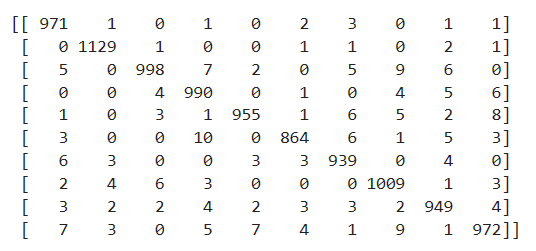

- Confusion matrix adalah sebuah tabel berukuran 10x10 yang digunakan untuk mengevaluasi kinerja model dalam mengklasifikasikan digit-digit dari dataset MNIST.
- Diagonal utama yang berjalan dari kiri atas ke kanan bawah mencerminkan jumlah prediksi yang benar untuk setiap kelas (digit 0 hingga 9).
- Diagonal yang berlawanan menunjukkan kesalahan prediksi, contohnya, baris pertama dan kolom kedua (1st row, 2nd column) menggambarkan jumlah gambar digit 0 yang salah diprediksi sebagai digit 1.
- Angka-angka dalam matriks ini merepresentasikan jumlah gambar yang diklasifikasikan dengan benar (true positives) dan yang salah (false positives dan false negatives).

3. Konfigurasi Model:
- Pra Pengolahan Data:
Citra-citra dari dataset MNIST dilatih setelah diubah menjadi vektor 1D dan dinormalisasi agar berada dalam rentang 0 hingga 1.

- Arsitektur ANN:
- Model menggunakan arsitektur ANN dengan tiga lapisan, yaitu satu lapisan input, dua lapisan tersembunyi, dan satu lapisan output.
- Input layer memiliki 784 unit (28x28 piksel) dan fungsi aktivasi ReLU.
- Hidden layer pertama memiliki 128 unit dengan aktivasi ReLU.
- Hidden layer kedua memiliki 64 unit dengan aktivasi ReLU.
- Output layer memiliki 10 unit (sesuai dengan jumlah kelas digit) dengan aktivasi softmax.

Pelatihan Model:

Model dilatih selama 10 epoch dengan menggunakan optimizer 'adam', loss function 'sparse_categorical_crossentropy' (karena ini adalah masalah klasifikasi multikelas), dan metrik akurasi.

Hasil :    
Hasil pengujian menunjukkan bahwa model memiliki kemampuan yang sangat baik dalam mengklasifikasikan digit-digit MNIST, dengan tingkat akurasi sekitar 97,76%.
